# Assessment 1

In [ ]:
# Data Importing Process
!gdown --id 1D8fqMX658E2DX9GyuytMWGhvrrugy1Z7

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1D8fqMX658E2DX9GyuytMWGhvrrugy1Z7
To: /content/Cardiovascular dataset.csv
100% 2.94M/2.94M [00:00<00:00, 170MB/s]


In [ ]:
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
card = pd.read_csv('Cardiovascular dataset.csv', sep=';')



### 1. What is the shape of the dataset?

In [ ]:
card.shape

(70000, 13)

--> There are 70000 rows and 13 columns in dataset.

### 2. Are there any missing values in the dataset?

In [ ]:

card.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


### 3. What are the unique values for categorical features like gender, cholesterol, gluc?

In [ ]:
card['gender'].unique()

array([2, 1])

--> The gender column has two unique values 1 for women and 2 for men.

In [ ]:
card['cholesterol'].unique()

array([1, 3, 2])

--> The cholesterol column has three unique values example like 1 for Normal, 2 for Above Normal and 3 for Well above normal.

In [ ]:
card['gluc'].unique()

array([1, 2, 3])

--> The gluc column has three unique values example like 1 for Normal, 2 for Above Normal and 3 for Well above normal.

### 4. What’s the average age of patients (in years)?

In [ ]:
card.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
age = (card['age'] / 365).round()
int(age.mean())

53

--> The average age of the patients is 53 years.

### 5. What is the distribution of the target variable (cardio)?

Text(0, 0.5, 'No of Patients')

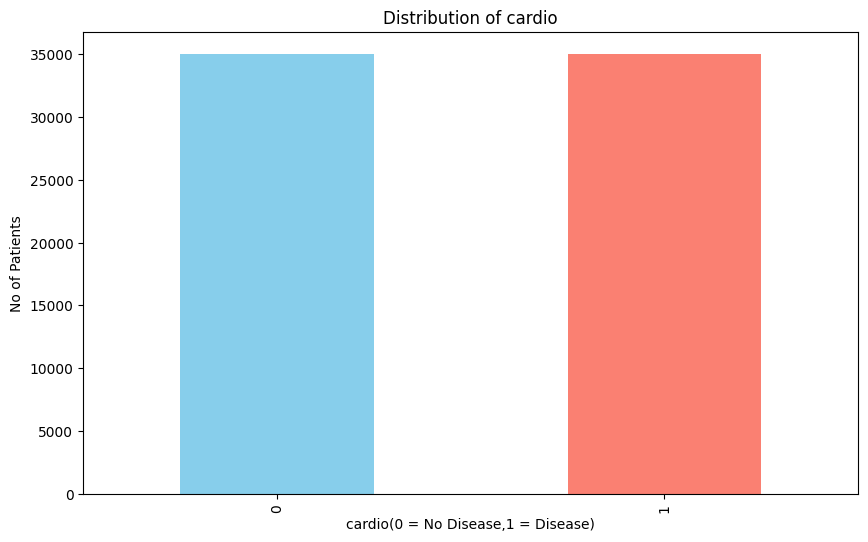

In [ ]:
plt.figure(figsize=(10,6))
c = card['cardio'].value_counts()
c.plot(kind='bar',color=['skyblue','salmon'])
plt.title('Distribution of cardio')
plt.xlabel('cardio(0 = No Disease,1 = Disease)')
plt.ylabel('No of Patients')

--> The target variable cardio is evenly split between the two categorys.

0 = no cardiovascular disease and 1 = cardiovascular disease

### 6. What is the average age (in years) of patients?

In [ ]:
age = (card['age'] / 365).round()
int(age.mean())

53

--> The average age of the patients is 53 years.

### 7. What is the distribution of BMI? (Create new BMI feature)

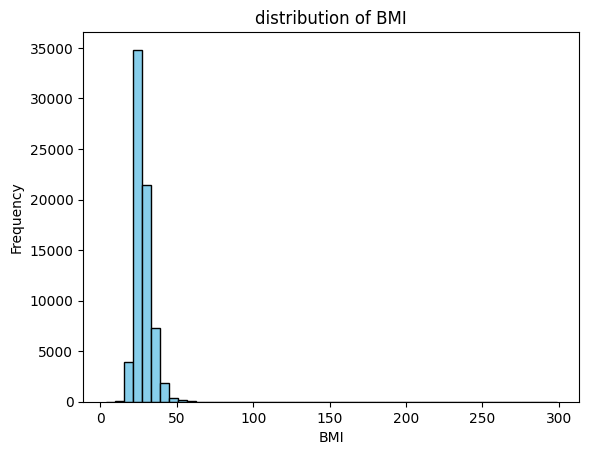

In [ ]:
card['bmi'] = card['weight'] / ((card['height']/100) ** 2)
plt.hist(card['bmi'],bins=50,color='skyblue',edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('distribution of BMI')
plt.show()


In [ ]:
card['bmi'].describe()

,bmi
count,70000.000000
mean,27.556513
std,6.091511
min,3.471784
25%,23.875115
50%,26.374068
75%,30.222222
max,298.666667


--> BMI calculate on this formula BMI = weight / height(square).

--> The BMI distribution is right-skewed, with most patients in the overweight.

The average BMI is 27.56, and some extreme values indicate outliers.

### 8.  Are there outliers in height or weight?

In [ ]:
print(card['height'].describe())
print(card['weight'].describe())

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64
count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


--> Yes, there are outliers in both height and weight.

--> The minimum of 55 cm and maximum of 250 cm are highly unrealistic for a person.

-->Similarly, the minimum of 10 kg and maximum of 200 kg are far outside a normal weight range.

### 9. Are there implausible blood pressure values (e.g., ap_hi < ap_lo or too high)?

In [ ]:
ibp_values = card[
    (card['ap_hi'] < card['ap_lo']) | (card['ap_hi'] < 80) | (card['ap_hi'] > 250) | (card['ap_lo'] < 50) | (card['ap_lo'] > 200)
]
ibp = len(ibp_values)
print(ibp)

1348


-->  Yes, there are implausible blood pressure values.

### 10. How many rows have incorrect blood pressure values?
### Column             
### ap_hi            
### ap_lo            
### ap_hi >= ap_lo  
### Condition                      
### between 80 and 250   
### between 50 and 200   
### Reason               
### realistic systolic   
### realistic diastolic  
### systolic must be ≥ diastolic   logical     

In [ ]:
ibp_values = card[
    (card['ap_hi'] < card['ap_lo'])| (card['ap_hi'] < 80) | (card['ap_hi'] > 250) | (card['ap_lo'] < 50) | (card['ap_lo'] > 200)
]
ibp = len(ibp_values)
print(ibp)

1348


--> There are 1,348 rows in the dataset that contain incorrect blood pressure values.

### 11. Remove rows with invalid blood pressure, height, or weight?
### Height between  120cm to 220cm
### Weight between 40 to 200kg

In [ ]:
initial_rows = len(card)

ibp_values = (
    (card['ap_hi'] < card['ap_lo']) | (card['ap_hi'] < 80) | (card['ap_hi'] > 250) | (card['ap_lo'] < 50) | (card['ap_lo'] > 200) | (card['height'] < 120) | (card['height'] > 220) | (card['weight'] < 40) | (card['weight'] > 200)
)

cc = card.drop(card[ibp_values].index)

rr = initial_rows - len(cc)
print(f'Total rows removed {rr}')


Total rows removed 1447


--> Out of the initial 70,000 rows, 1,447 were identified and removed because they contained invalid values for blood pressure, height, or weight.

--> After cleaning, the dataset contains 68,553 reliable rows available.

### 12. What is the distribution of cholesterol and glucose levels after cleaning?

In [ ]:
initial_rows = len(card)

ibp_values = (
    (card['ap_hi'] < card['ap_lo']) | (card['ap_hi'] < 80) | (card['ap_hi'] > 250) | (card['ap_lo'] < 50) | (card['ap_lo'] > 200) | (card['height'] < 120) | (card['height'] > 220) | (card['weight'] < 40) | (card['weight'] > 200)
)

card.drop(card[ibp_values].index, inplace=True)

rr = initial_rows - len(card)
print(f'Total rows removed {rr}')


Total rows removed 1447


In [ ]:
card.shape

(68553, 14)

/tmp/ipython-input-4189534478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cholesterol', data=card, ax=axes[0], palette='viridis')
/tmp/ipython-input-4189534478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gluc', data=card, ax=axes[1], palette='plasma')


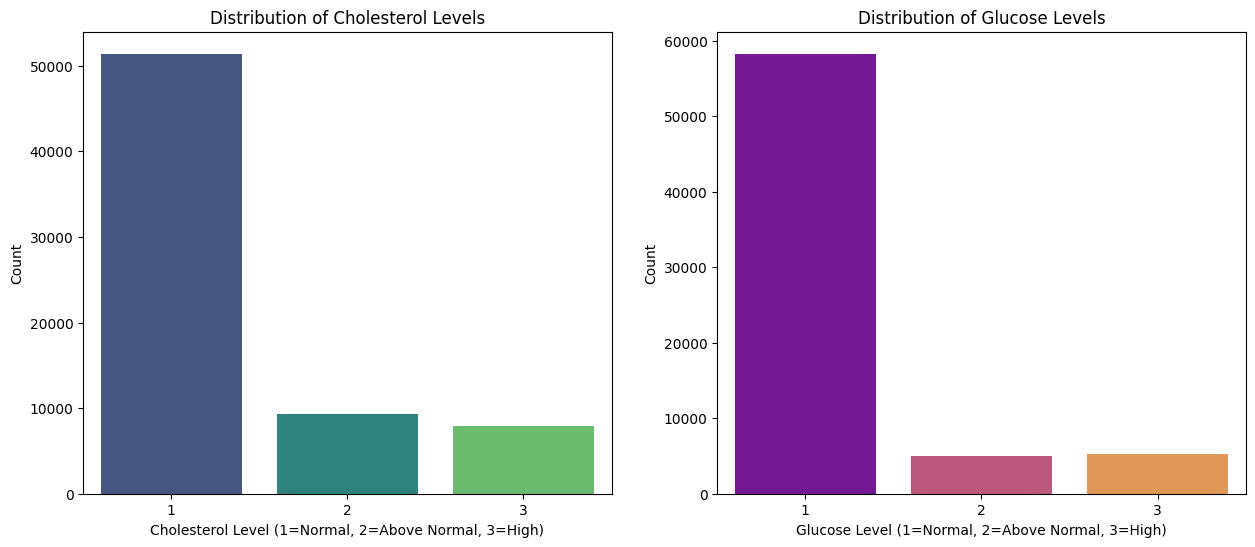

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.countplot(x='cholesterol', data=card, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Cholesterol Levels')
axes[0].set_xlabel('Cholesterol Level (1=Normal, 2=Above Normal, 3=High)')
axes[0].set_ylabel('Count')

sns.countplot(x='gluc', data=card, ax=axes[1], palette='plasma')
axes[1].set_title('Distribution of Glucose Levels')
axes[1].set_xlabel('Glucose Level (1=Normal, 2=Above Normal, 3=High)')
axes[1].set_ylabel('Count')

plt.show()

The charts show that most people in the dataset have normal cholesterol and glucose levels.

Distribution of Cholesterol --> More than 50,000 people have normal cholesterol. Only a smaller number have above-normal or high cholesterol.

Distribution of Glucose --> Most people also have normal glucose levels, with fewer people in the higher categories.

### 13. How many smokers have cardiovascular disease?

In [ ]:
card[(card['smoke'] == 1) & (card['cardio'] == 1)].shape[0]


2826

--> In dataset Total 2,929 people who smoke also have cardiovascular disease.

### 14.  Does alcohol intake correlate with higher cardio risk?

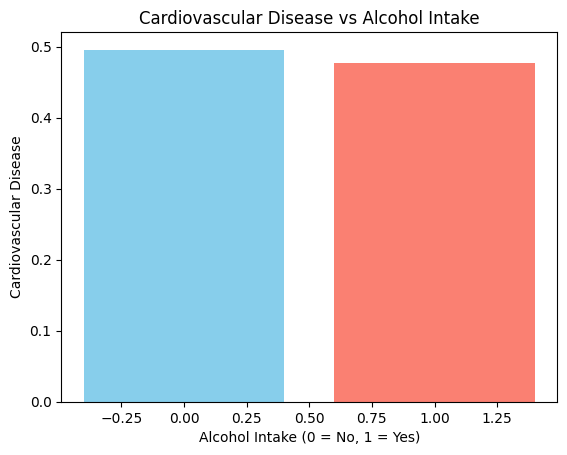

In [ ]:
alco_cardio = card.groupby('alco')['cardio'].mean()

plt.bar(alco_cardio.index, alco_cardio,color=['skyblue', 'salmon'])
plt.xlabel('Alcohol Intake (0 = No, 1 = Yes)')
plt.ylabel('Cardiovascular Disease')
plt.title('Cardiovascular Disease vs Alcohol Intake')
plt.show()

--> people who drink alcohol and people who don’t have about the same chance of having cardiovascular disease. This means that drinking alcohol does not seem strongly linked to heart disease in this data.

### 15. What’s the correlation between features?

In [ ]:
card.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


--> height and weight show a positive correlation and Systolic and diastolic blood pressure are also positively related.

--> Age has a weaker positive link with cardiovascular disease, meaning older people are more likely to have it.

--> Lifestyle factors like smoking, alcohol, and physical activity don’t show very strong correlations with cardiovascular disease in this dataset.

### 16. Compare mean BMI for cardio vs. non-cardio


In [ ]:
card.groupby('cardio')['bmi'].mean()

,bmi
cardio,
0,26.480744
1,28.470066



--> People without cardiovascular disease cardio = 0 have an average BMI of about 26.6.

--> People with cardiovascular disease cardio = 1 have an average BMI of about 28.6.


### 17. Plot age distribution for those with and without cardio disease


In [ ]:
card['age_y'] = card['age'] / 365


In [ ]:
card['age_y'] = card['age_y'].astype(int)

/tmp/ipython-input-2646936305.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = card.groupby(['age_group', 'cardio']).size().unstack(fill_value=0)


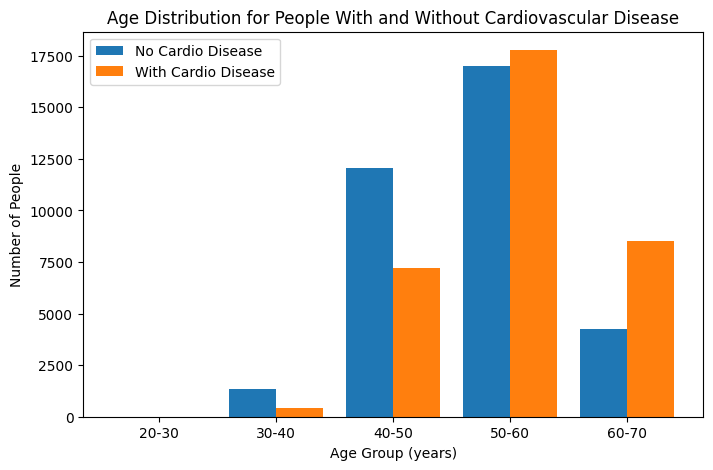

In [ ]:
bins = [20,30, 40, 50, 60, 70]
labels = ['20-30','30-40', '40-50', '50-60', '60-70']
card['age_group'] = pd.cut(card['age_y'], bins=bins, labels=labels, right=False)
age_dist = card.groupby(['age_group', 'cardio']).size().unstack(fill_value=0)
age_dist.plot(kind='bar', figsize=(8,5), width=0.8)
plt.xlabel('Age Group (years)')
plt.ylabel('Number of People')
plt.title('Age Distribution for People With and Without Cardiovascular Disease')
plt.legend(['No Cardio Disease', 'With Cardio Disease'])
plt.xticks(rotation=0)
plt.show()

--> The age distribution shows that cardiovascular disease is more common in older age groups.

--> In the younger groups 20–40 years, most people do not have cardiovascular disease.

--> Starting from the 40–50 age group, the number of people with cardiovascular disease begins to rise.

--> In the 50–70 age groups, people with cardiovascular disease make up a much larger share compared to those without.


### 18. Boxplot of systolic blood pressure by cardio status

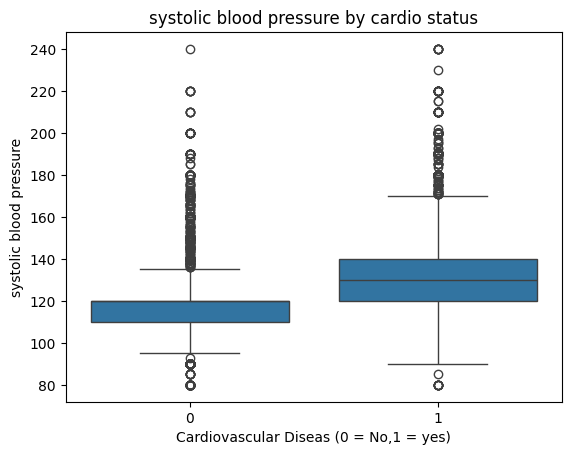

In [ ]:
sns.boxplot(data=card,x='cardio',y='ap_hi')
plt.xlabel('Cardiovascular Diseas (0 = No,1 = yes)')
plt.ylabel('systolic blood pressure')
plt.title('systolic blood pressure by cardio status')
plt.show()

--> The boxplot shows that people with cardiovascular disease cardio = 1 generally have higher systolic blood pressure compared to those without the disease cardio = 0. The median blood pressure is higher in the cardio group

### 19.  What is the distribution of cholesterol levels?

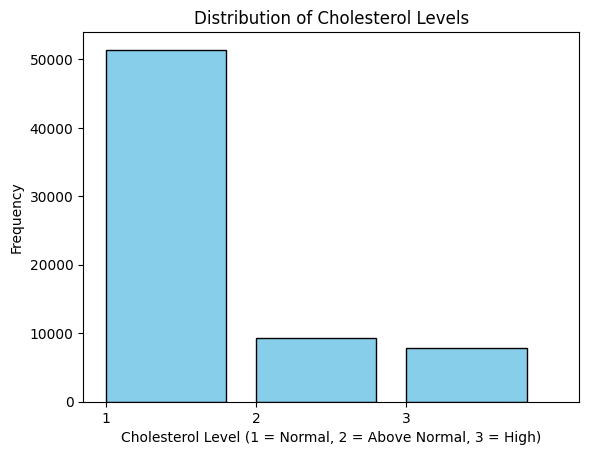

In [ ]:

plt.hist(card["cholesterol"], bins=[1,2,3,4], color="skyblue", edgecolor="black", width=0.8)
plt.xlabel("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = High)")
plt.ylabel("Frequency")
plt.title("Distribution of Cholesterol Levels")
plt.xticks([1, 2, 3])
plt.show()


--> Most people in the dataset have normal cholesterol level 1.

--> A smaller number of individuals fall into the above-normal category level 2, and the fewest are in the high cholesterol category level 3.


### 20. What percentage of patients have above-normal glucose levels?

In [ ]:
ang = card[card["gluc"] > 1].shape[0]

tp= len(card)

percent = (ang / tp) * 100

print(int(percent))

14


--> About 14% of patients in this dataset have above-normal glucose levels.

## Summary
--> The dataset started with 70,000 rows and 13 columns and, after cleaning, has 68,553 reliable records. The average patient age is 53 years.

--> Most patients have normal cholesterol and glucose, though about 14% show above-normal glucose.


--> The average BMI is 27.6 . People with cardiovascular disease have a higher BMI 28.6 than those without 26.6. Cardiovascular disease is evenly split overall but becomes more common from age 40 onward.


--> Lifestyle factors show weak links and 2,929 smokers also have cardiovascular disease, while alcohol intake makes little difference.

--> Height and weight are positively related, as are systolic and diastolic blood pressure. Age has a weaker positive link to cardiovascular disease, and people with the disease tend to have higher systolic blood pressure.

## Insightful Analysis Questions

### 1. What percentage of the dataset has cardiovascular disease?


In [ ]:
cd = card[card['cardio']== 1].shape[0]

tp = len(card)

percent = (cd/tp)*100
print(int(percent))

49


### 2. Is there a link between cholesterol and heart disease?


In [ ]:
card.groupby('cholesterol')['cardio'].mean() * 100


,cardio
cholesterol,
1,43.551933
2,59.644779
3,76.246819


### 3.  Does age impact heart disease prevalence?

In [ ]:
card.groupby("cardio")["age_y"].mean()

,age_y
cardio,
0,51.226322
1,54.464638


### 4. Is BMI higher in those with heart disease?

In [ ]:
card.groupby('cardio')['bmi'].mean()

,bmi
cardio,
0,26.480744
1,28.470066


### 5. Does physical activity reduce heart disease risk?

In [ ]:
card.groupby("active")["cardio"].mean() *100

,cardio
active,
0,53.296255
1,48.547251


### 6. Do smokers have more heart disease?

In [ ]:
card.groupby("smoke")["cardio"].mean() * 100

,cardio
smoke,
0,49.736084
1,46.842367


### 7. Is systolic pressure significantly higher in those with heart disease?

In [ ]:
card.groupby("cardio")["ap_hi"].mean()


,ap_hi
cardio,
0,119.622430
1,133.898499


## Summary

--> About 49% of people in the dataset have heart disease.

--> Older age, higher BMI, and higher systolic blood pressure are strongly linked with heart disease. Cholesterol also plays a role, as people with above-normal or high cholesterol are more likely to have it.

--> Being physically active seems to reduce the risk, while smoking shows only a small increase in risk.

## Conclusion

--> About half of the patients in the dataset have cardiovascular disease.

--> Heart disease is strongly linked to older age, higher BMI, higher systolic blood pressure, and above-normal cholesterol.

--> The risk becomes more common starting from age 40.

--> Patients with heart disease generally have higher BMI and blood pressure than those without.

--> Physical activity seems to reduce risk, while smoking shows only a small increase.